In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load image
img = cv2.imread("I.png")
img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

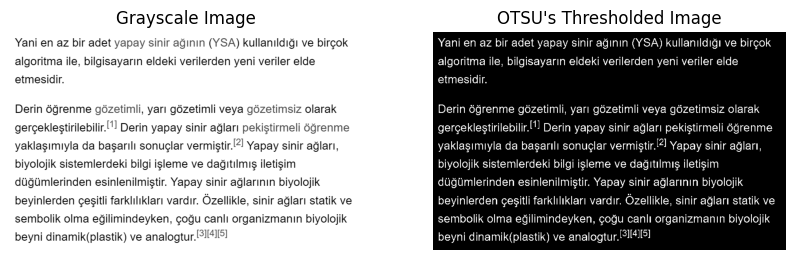

In [3]:
# convert to gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# threshold the grayscale image
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Görüntüleri matplotlib ile plot etme
plt.figure(figsize=(10, 5))

# Grayscale görüntü
plt.subplot(1, 2, 1)
plt.title('Grayscale Image')
plt.imshow(gray, cmap='gray')
plt.axis('off')

# Eşiklenmiş görüntü
plt.subplot(1, 2, 2)
plt.title('OTSU\'s Thresholded Image')
plt.imshow(thresh, cmap='gray')
plt.axis('off')

plt.show()

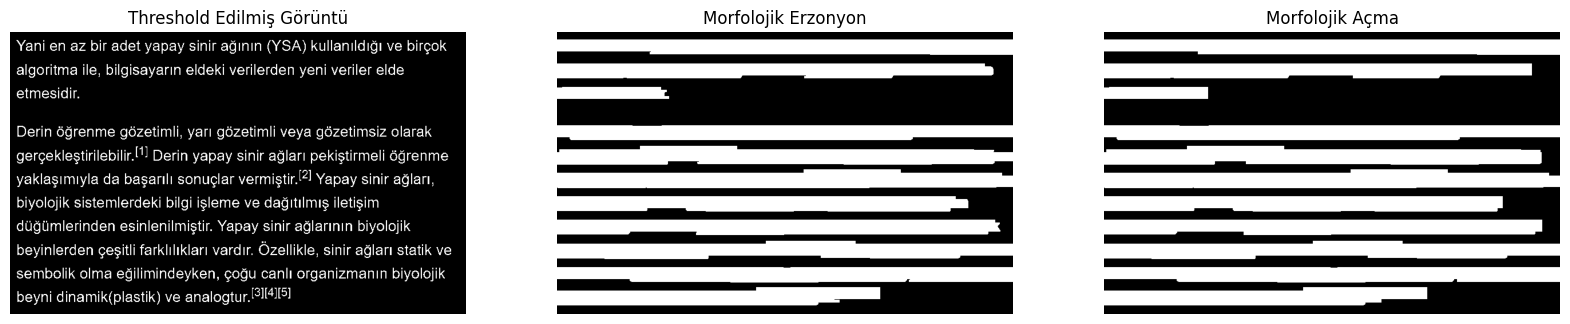

In [4]:
# use morphology erode to blur horizontally
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (151, 3))
morph1 = cv2.morphologyEx(thresh, cv2.MORPH_DILATE, kernel)

# use morphology open to remove thin lines from dotted lines
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 17))
morph = cv2.morphologyEx(morph1, cv2.MORPH_OPEN, kernel)

# Görüntüleri matplotlib ile plot etme
plt.figure(figsize=(20, 5))

# Grayscale görüntü
plt.subplot(1, 3, 1)
plt.title('Threshold Edilmiş Görüntü')
plt.imshow(thresh, cmap='gray')
plt.axis('off')

# Eşiklenmiş görüntü
plt.subplot(1, 3, 2)
plt.title('Morfolojik Erzonyon')
plt.imshow(morph1, cmap='gray')
plt.axis('off')

# Eşiklenmiş görüntü
plt.subplot(1, 3, 3)
plt.title('Morfolojik Açma')
plt.imshow(morph, cmap='gray')
plt.axis('off')

plt.show()

In [5]:
# Yatay projeksiyon kullanarak satırları tespit et
horizontal_sum = np.sum(morph, axis=1)
rows = np.where(horizontal_sum > 0)[0]

rows

array([ 13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
       108, 109, 110, 111, 112, 113, 114, 115, 116, 163, 164, 165, 166,
       167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179,
       180, 181, 182, 183, 184, 185, 186, 187, 188, 199, 200, 201, 202,
       203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,
       216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228,
       229, 230, 231, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249,
       250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262,
       263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 287, 288, 289,
       290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 30

In [6]:
# Satır aralıklarını belirle
row_intervals = []
satir_baslangic = rows[0]
for i in range(1, len(rows)):
    if rows[i] != rows[i-1] + 1: #eğer ardışık değilse
        row_intervals.append((satir_baslangic, rows[i-1]))
        satir_baslangic = rows[i]
row_intervals.append((satir_baslangic, rows[-1]))

row_intervals

[(13, 39),
 (55, 80),
 (96, 116),
 (163, 188),
 (199, 231),
 (240, 272),
 (287, 313),
 (328, 354),
 (365, 396),
 (411, 437),
 (446, 477)]

In [7]:
# Toplam satır sayısını yazdır
print(f"Toplam satır sayısı: {len(row_intervals)}")

Toplam satır sayısı: 11


In [8]:
# GÖRSELLEŞTİRME AMAÇLI 
for row_num, (start_row, end_row) in enumerate(row_intervals):

    # Satırın görüntü kesitini oluştur. Böylece her satır ayrı ayrı incelenecektir
    row_image = thresh[start_row:end_row+1, :]

    cv2.imshow('Image of the Row', row_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [9]:
# Her satırdaki harf sayısını bulma
for row_num, (start_row, end_row) in enumerate(row_intervals):

    # Satırın görüntü kesitini oluştur. Böylece her satır ayrı ayrı incelenecektir
    row_image = thresh[start_row:end_row+1, :]

    # Dikey projeksiyon kullanarak harfleri tespit et
    vertical_sum = np.sum(row_image, axis=0)
    cols = np.where(vertical_sum > 0)[0]

    # Harf aralıklarını belirle
    letter_intervals = []
    start_col = cols[0]
    for j in range(1, len(cols)):
        if cols[j] != cols[j-1] + 1:
            letter_intervals.append((start_col, cols[j-1]))
            start_col = cols[j]
    letter_intervals.append((start_col, cols[-1]))
    # Satırdaki harf sayısını yazdır
    print(f"Satir {row_num + 1} - Harf sayisi: {len(letter_intervals)}")


Satir 1 - Harf sayisi: 55
Satir 2 - Harf sayisi: 56
Satir 3 - Harf sayisi: 10
Satir 4 - Harf sayisi: 55
Satir 5 - Harf sayisi: 64
Satir 6 - Harf sayisi: 59
Satir 7 - Harf sayisi: 52
Satir 8 - Harf sayisi: 55
Satir 9 - Harf sayisi: 66
Satir 10 - Harf sayisi: 56
Satir 11 - Harf sayisi: 42


In [11]:
# GÖRSELLEŞTİRME
# Her satırdaki harf sayısını bulma
output_img = img.copy()
# Her satırdaki harf sayısını bulma
for row_num, (start_row, end_row) in enumerate(row_intervals):
    # Satırın görüntü kesitini oluştur
    row_image = thresh[start_row:end_row+1, :]

    # Dikey projeksiyon kullanarak harfleri tespit et
    vertical_sum = np.sum(row_image, axis=0)
    cols = np.where(vertical_sum > 0)[0]
    # Harf aralıklarını belirle
    letter_intervals = []
    start_col = cols[0]
    for j in range(1, len(cols)):
        if cols[j] != cols[j-1] + 1:
            letter_intervals.append((start_col, cols[j-1]))
            start_col = cols[j]
    letter_intervals.append((start_col, cols[-1]))

    # Satırdaki harf sayısını yazdır
    print(f"Satır {row_num + 1} - Harf sayısı: {len(letter_intervals)}")
    # Harfleri dikdörtgen içine alma
    for (start_col, end_col) in letter_intervals:
        cv2.rectangle(output_img, 
                    (start_col, start_row), 
                    (end_col, end_row), 
                    (0, 255, 0), 
                    2)

# Görüntüyü göster
cv2.imshow('Detected Letters', output_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Satır 1 - Harf sayısı: 55
Satır 2 - Harf sayısı: 56
Satır 3 - Harf sayısı: 10
Satır 4 - Harf sayısı: 55
Satır 5 - Harf sayısı: 64
Satır 6 - Harf sayısı: 59
Satır 7 - Harf sayısı: 52
Satır 8 - Harf sayısı: 55
Satır 9 - Harf sayısı: 66
Satır 10 - Harf sayısı: 56
Satır 11 - Harf sayısı: 42
